<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/tf/cifar10_inference_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CIFAR10 모델을 이용한 추론

## 1-1. 환경구성 : 파이썬 모듈 import

In [1]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

##1-2. 추론 파일 로드


* 추론파일: 트레이닝을 통해 계수를 최적화한 인공신경망을 파일로 만들어 저장한 것.  > 패들렛에서 다운로드 하기
* 이 추론파일을 사용해서 feedforward 측 추론/예측을 진행함.
* "cifar10.h5"을 코랩 디스크에 미리 업로드 해 놓아야 함


In [4]:
# 추론 파일을 로드 함
model = load_model('./cifar10.h5')

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

##1-3. 테스트 이미지 로드

내 이미지를 추론파일을 통해서 예측해 보기

1. 인터넷에서 CIFAR10 데이터 종류 중 하나를 선택해서 코랩으로 옮기기
2. '비행기'이미지를 코랩으로 업로드 함



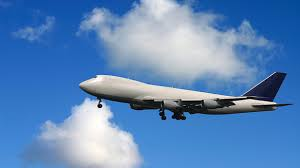

In [5]:
# 내가 판단할 이미지를 로드 OpenCV로 한다.
img = cv2.imread('plane.png')
cv2_imshow(img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

##1-4. 테스트 이미지 전처리

###(1) 이미지 사이즈 조정
1. CIFAR10 추론파일은 32x32x3인 이미지로 학습.
2. 내 이미지의 사이즈를 32x32x3으로 축소
   - OpenCV 라이브러리를 이용해 사이즈 조정

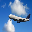

In [6]:
img_resized = cv2.resize(img, (32,32))
cv2_imshow(img_resized)
cv2.waitKey(2000)
cv2.destroyAllWindows()

###(2) 이미지 정규화

1. 이미지는 한 픽셀마다 3개의 0 ~ 255인 숫자로 구성되어 있음
2. 이 숫자의 범위를 0 ~ 1로 조정
  - feedforwarding 예측 성능 향상

In [9]:
# Normalizing
#img_norm = img.astype('float')/255.0
img_norm = img_resized.astype('float')/255.0
print(img_norm)

[[[0.6745098  0.34901961 0.13333333]
  [0.63921569 0.31764706 0.09019608]
  [0.66666667 0.3254902  0.0745098 ]
  ...
  [0.60392157 0.29803922 0.02745098]
  [0.60392157 0.29803922 0.02745098]
  [0.6        0.29411765 0.01568627]]

 [[0.6745098  0.34117647 0.10980392]
  [0.65882353 0.33333333 0.07843137]
  [0.66666667 0.32941176 0.07058824]
  ...
  [0.61176471 0.30588235 0.03529412]
  [0.61176471 0.30588235 0.03529412]
  [0.60784314 0.30196078 0.02352941]]

 [[0.66666667 0.3254902  0.0745098 ]
  [0.6745098  0.34117647 0.06666667]
  [0.66666667 0.33333333 0.06666667]
  ...
  [0.62352941 0.31764706 0.04705882]
  [0.61960784 0.31372549 0.04313725]
  [0.61960784 0.31372549 0.03529412]]

 ...

 [[0.83529412 0.54509804 0.28627451]
  [0.83529412 0.54509804 0.28627451]
  [0.73333333 0.50196078 0.30196078]
  ...
  [0.82352941 0.53333333 0.2745098 ]
  [0.81960784 0.52941176 0.27058824]
  [0.81960784 0.53333333 0.26666667]]

 [[0.84313725 0.55686275 0.30588235]
  [0.84705882 0.56078431 0.30980392]


### (2) 이미지 flattening

32x32x3인 이미지를 1x(32x32x3)으로 변경

In [13]:
# flattening
img_flat = img_norm.reshape((3072,1))
#print(img_flat.shape)

(3072, 1)


##1-5. 예측 실행

전처리된 이미지를 추론파일에 입력해서 예측을 실행

In [16]:
# 추론하기, inference, feed-forward
## X -> img_flat에 []을 한번더 씌운 것

X = np.asarray([img_flat])

#print(X.shape)

# 여기서 입력이미지를 추론파일에 곱하는 것
## return 값은 softmax

predictions = model(X, training=False)
print(predictions)
print(np.argmax(predictions), labelNames[np.argmax(predictions)])

#예측 실패

tf.Tensor(
[[5.8830707e-08 1.9756652e-09 1.7427067e-04 4.7826859e-07 4.0246605e-11
  9.2142558e-01 7.8399412e-02 1.8019063e-07 1.9085317e-17 2.9983476e-09]], shape=(1, 10), dtype=float32)
5 dog
